# DSO110 - Final Group Project - Lottery
Alberta "Albi" Kovatcheva and Barbra Treston



## Background
Albi and Barbra have chosen the “Mega Millions Winning Numbers” dataset because the lottery is something that is familiar and accessible to a wide range of people worldwide; it would be difficult to find someone who hasn’t dreamed of hitting the jackpot and changing their life forever. However, it is also widely accepted that the lottery is not set up to favor the player.  In the case of Mega Millions, although there is a 1 in 24 chance of winning something, the odds of choosing all 6 numbers correctly to win the jackpot is 1 in 302,575,350 - a fact that is posted openly on both the New York Lottery and Mega Millions websites.  By analyzing the winning numbers data as well as complementary datasets on lottery retailers, lottery aid to local school districts, and monies recouped from the lottery winnings of public aid recipients, Albi and Barbra hope to glean insight to make actionable suggestions on how lottery players can get the best return on their investment as well as to demonstrate for the average person whether the lottery serves any societal good or whether it may be best to abstain from playing altogether. 





## Data Wrangling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import nan
import datetime as dt
from datetime import date

### Import data.

### 1. Winning numbers May 17, 2002 to November 26, 2021

In [2]:
Winning_Numbers = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
pd.set_option("display.max_columns", None)
Winning_Numbers.head()

,Draw Date,Month,Day,Year,Weekday,Weekday.1,Quarter,Winning Numbers,Mega Ball,Multiplier,First,Second,Third,Fourth,Fifth
0,9/25/2020,9,25,2020,Fri,1,3,20 36 37 48 67,16,2.0,20,36,37,48,67
1,9/29/2020,9,29,2020,Tue,0,3,14 39 43 44 67,19,3.0,14,39,43,44,67
2,10/2/2020,10,2,2020,Fri,1,4,09 38 47 49 68,25,2.0,9,38,47,49,68
3,10/6/2020,10,6,2020,Tue,0,4,15 16 18 39 59,17,3.0,15,16,18,39,59
4,10/9/2020,10,9,2020,Fri,1,4,05 11 25 27 64,13,2.0,5,11,25,27,64


#### Convert 'Winning Numbers' to string and then separate terms into individual columns (5).

In [3]:
Winning_Numbers["AllNumbers"] = Winning_Numbers["Winning Numbers"].map(str) + " " + Winning_Numbers["Mega Ball"].map(str)

In [4]:
Winning_Numbers

,Draw Date,Month,Day,Year,Weekday,Weekday.1,Quarter,Winning Numbers,Mega Ball,Multiplier,First,Second,Third,Fourth,Fifth,AllNumbers
0,9/25/2020,9,25,2020,Fri,1,3,20 36 37 48 67,16,2.0,20,36,37,48,67,20 36 37 48 67 16
1,9/29/2020,9,29,2020,Tue,0,3,14 39 43 44 67,19,3.0,14,39,43,44,67,14 39 43 44 67 19
2,10/2/2020,10,2,2020,Fri,1,4,09 38 47 49 68,25,2.0,9,38,47,49,68,09 38 47 49 68 25
3,10/6/2020,10,6,2020,Tue,0,4,15 16 18 39 59,17,3.0,15,16,18,39,59,15 16 18 39 59 17
4,10/9/2020,10,9,2020,Fri,1,4,05 11 25 27 64,13,2.0,5,11,25,27,64,05 11 25 27 64 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,11/12/2021,11,12,2021,Fri,1,4,30 32 42 46 48,15,2.0,30,32,42,46,48,30 32 42 46 48 15
2032,11/16/2021,11,16,2021,Tue,0,4,06 22 44 53 65,3,3.0,6,22,44,53,65,06 22 44 53 65 3
2033,11/19/2021,11,19,2021,Fri,1,4,05 23 52 53 59,18,5.0,5,23,52,53,59,05 23 52 53 59 18
2034,11/23/2021,11,23,2021,Tue,0,4,07 24 54 57 58,6,3.0,7,24,54,57,58,07 24 54 57 58 6


In [5]:
df = Winning_Numbers['AllNumbers']
df2 = pd.DataFrame(df.str.split(" ").apply(pd.Series, 0).stack())
df2.index = df2.index.droplevel(-1)
df2.head(20)

,0
0,20
0,36
0,37
0,48
0,67
0,16
1,14
1,39
1,43
1,44


In [6]:
df3 = Winning_Numbers['Draw Date']
df4 = Winning_Numbers['Weekday.1']

In [7]:
df3.head()

0    9/25/2020
1    9/29/2020
2    10/2/2020
3    10/6/2020
4    10/9/2020
Name: Draw Date, dtype: object

In [8]:
df4.head()

0    1
1    0
2    1
3    0
4    1
Name: Weekday.1, dtype: int64

In [9]:
merge1 = pd.merge(df3, df4,how='inner', left_index=True, right_index=True)
merge1.head(10)

,Draw Date,Weekday.1
0,9/25/2020,1
1,9/29/2020,0
2,10/2/2020,1
3,10/6/2020,0
4,10/9/2020,1
5,10/13/2020,0
6,10/16/2020,1
7,10/20/2020,0
8,10/23/2020,1
9,10/27/2020,0


In [10]:
df2.head(10)

,0
0,20
0,36
0,37
0,48
0,67
0,16
1,14
1,39
1,43
1,44


In [11]:
merged = pd.merge(merge1, df2,how='inner', left_index=True, right_index=True)
merged.columns = ['Date','WeekdayEncoded','WinNumber']
merged.reset_index(inplace=True)
merged.head(20)
# Winning_Numbers2['WeekdayEncoded'] = pd.DatetimeIndex(Winning_Numbers2['Date']).dayofweek

,index,Date,WeekdayEncoded,WinNumber
0,0,9/25/2020,1,20
1,0,9/25/2020,1,36
2,0,9/25/2020,1,37
3,0,9/25/2020,1,48
4,0,9/25/2020,1,67
5,0,9/25/2020,1,16
6,1,9/29/2020,0,14
7,1,9/29/2020,0,39
8,1,9/29/2020,0,43
9,1,9/29/2020,0,44


In [12]:
Winning_Numbers2 = merged
Winning_Numbers2.head()

,index,Date,WeekdayEncoded,WinNumber
0,0,9/25/2020,1,20
1,0,9/25/2020,1,36
2,0,9/25/2020,1,37
3,0,9/25/2020,1,48
4,0,9/25/2020,1,67


In [13]:
Winning_Numbers2[['Month','Day','Year']] =  Winning_Numbers2['Date'].str.split('/', expand=True)
Winning_Numbers2.head(10)

,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year
0,0,9/25/2020,1,20,9,25,2020
1,0,9/25/2020,1,36,9,25,2020
2,0,9/25/2020,1,37,9,25,2020
3,0,9/25/2020,1,48,9,25,2020
4,0,9/25/2020,1,67,9,25,2020
5,0,9/25/2020,1,16,9,25,2020
6,1,9/29/2020,0,14,9,29,2020
7,1,9/29/2020,0,39,9,29,2020
8,1,9/29/2020,0,43,9,29,2020
9,1,9/29/2020,0,44,9,29,2020


In [14]:
Winning_Numbers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           12216 non-null  int64 
 1   Date            12216 non-null  object
 2   WeekdayEncoded  12216 non-null  int64 
 3   WinNumber       12216 non-null  object
 4   Month           12216 non-null  object
 5   Day             12216 non-null  object
 6   Year            12216 non-null  object
dtypes: int64(2), object(5)
memory usage: 668.2+ KB


In [15]:
# Winning_Numbers2.column = Winning_Numbers2.column.str.strip()
Winning_Numbers2['WinNumber'] = Winning_Numbers2['WinNumber'].astype(int)
Winning_Numbers2['Year'] = Winning_Numbers2['Year'].astype(int)
Winning_Numbers2['Day'] = Winning_Numbers2['Day'].astype(int)
Winning_Numbers2['Year'] = Winning_Numbers2['Year'].astype(int)
Winning_Numbers2['Day'] = Winning_Numbers2['Day'].astype(int)


In [16]:
Winning_Numbers2.to_csv('WinningNumbersRevised.csv')

# Data Exploration

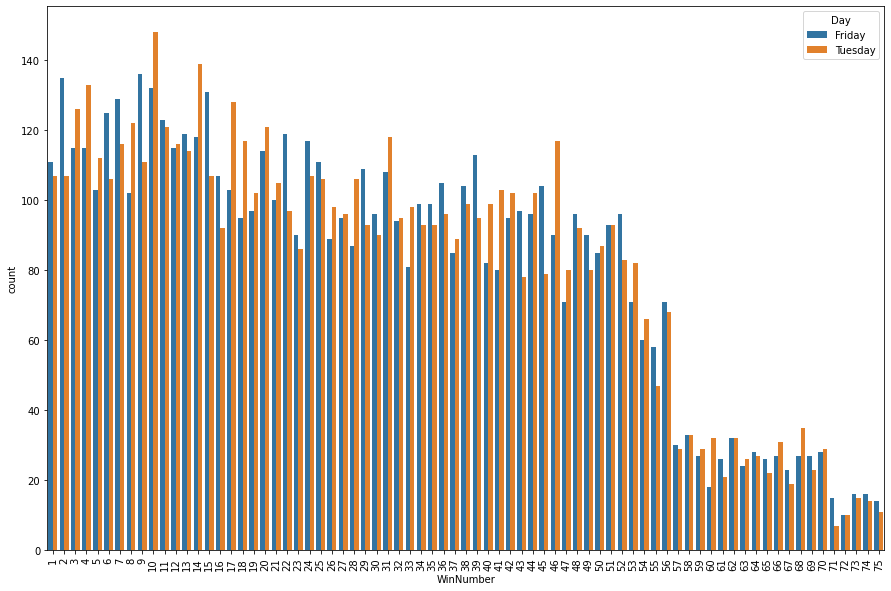

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x="WinNumber", hue="WeekdayEncoded", data=Winning_Numbers2)
plt.legend(title='Day', loc='upper right', labels=['Friday', 'Tuesday'])
plt.xticks(rotation = 'vertical')
plt.show()

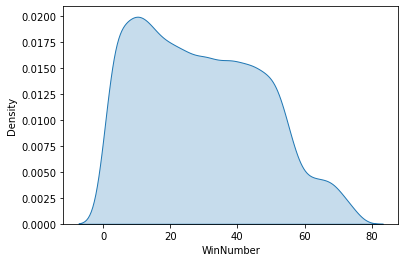

In [18]:
import numpy as np
sns.kdeplot(Winning_Numbers2["WinNumber"],shade=True)
plt.show()

In [19]:
import scipy.stats as stats

In [20]:
fvalue, pvalue = stats.f_oneway(Winning_Numbers2["WinNumber"], Winning_Numbers2['WeekdayEncoded'])
print(pvalue)


0.0


# Random Forest Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Winning_Numbers2 = pd.read_csv('WinningNumbersRevised.csv')
# pd.set_option("display.max_columns", None)
Winning_Numbers2.head()

,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year
0,0,9/25/2020,1,20,9,25,2020
1,0,9/25/2020,1,36,9,25,2020
2,0,9/25/2020,1,37,9,25,2020
3,0,9/25/2020,1,48,9,25,2020
4,0,9/25/2020,1,67,9,25,2020


In [23]:
Winning_Numbers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           12216 non-null  int64 
 1   Date            12216 non-null  object
 2   WeekdayEncoded  12216 non-null  int64 
 3   WinNumber       12216 non-null  int32 
 4   Month           12216 non-null  object
 5   Day             12216 non-null  int32 
 6   Year            12216 non-null  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 525.0+ KB


In [24]:
#x = Winning_Numbers2.drop(['index', 'Date', 'Month', 'Day', 'Year', 'WinNumber'], axis=1)
x = Winning_Numbers2['WeekdayEncoded']
y = Winning_Numbers2['WinNumber']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [26]:
bigxtrain = x_train.values.reshape(-1, 1)
bigytrain = y_train.values.reshape(-1, 1)
bigxtest = x_test.values.reshape(-1, 1)
bigytest = y_test.values.reshape(-1, 1)

In [27]:
# bigxtrain.shape
# bigytrain.shape

In [28]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(bigxtrain, bigytrain)

<ipython-input-28-9ca936085128>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


RandomForestClassifier(n_estimators=500, random_state=76)

In [29]:
forestPredictions = forest.predict(bigxtest)
print(confusion_matrix(bigytest, forestPredictions))
print(classification_report(bigytest, forestPredictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        66
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        73
           9       0.00      0.00      0.00        79
          10       0.02      0.53      0.04        78
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        82
          15       0.02      0.48      0.03        65
          16   

C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500, 1000]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(bigxtrain, bigytrain)
    result = accuracy_score(bigytest, forest.predict(bigxtest))
    results.append(result) 
    print(n, ':', result)

1 : 0.021282401091405185
4 : 0.019645293315143246
5 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)
<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)
<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)
<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)
<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d arr

8 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


10 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


20 : 0.019645293315143246
50 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


75 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


100 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


250 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


500 : 0.019645293315143246


<ipython-input-31-5fe070d7a186>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


1000 : 0.019645293315143246


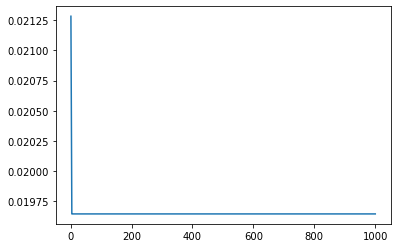

In [32]:
plt.plot(n_estimators_array, results)

In [33]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_leaf': [1, 2, 4]}


In [34]:
rf = RandomForestClassifier(n_estimators=500)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, random_state=42)

In [35]:
rf_random.fit(bigxtrain, bigytrain)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [36]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40}

In [37]:
# clf=RandomForestClassifier(n_estimators=100)
# clf.fit(bigxtrain,bigytrain)
# y_pred=clf.predict(bigxtest)

In [38]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features=None, max_depth=80)
forest.fit(bigxtrain, bigytrain)

<ipython-input-38-d53fd3444811>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(bigxtrain, bigytrain)


RandomForestClassifier(max_depth=80, max_features=None, min_samples_leaf=2,
                       n_estimators=500)

In [39]:
forestPredictions = forest.predict(bigxtest)
print(confusion_matrix(bigytest, forestPredictions))
print(classification_report(bigytest, forestPredictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        75
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        66
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        73
           9       0.00      0.00      0.00        79
          10       0.02      0.53      0.04        78
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        82
          15       0.02      0.48      0.03        65
          16   

C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# feature_importances = pd.Series(forest.feature_importances_)
# feature_importances

# Random Forest Model with Multiple Features

## Data Wrangling for New Model.

In [41]:
Winning_Numbers.head()

,Draw Date,Month,Day,Year,Weekday,Weekday.1,Quarter,Winning Numbers,Mega Ball,Multiplier,First,Second,Third,Fourth,Fifth,AllNumbers
0,9/25/2020,9,25,2020,Fri,1,3,20 36 37 48 67,16,2.0,20,36,37,48,67,20 36 37 48 67 16
1,9/29/2020,9,29,2020,Tue,0,3,14 39 43 44 67,19,3.0,14,39,43,44,67,14 39 43 44 67 19
2,10/2/2020,10,2,2020,Fri,1,4,09 38 47 49 68,25,2.0,9,38,47,49,68,09 38 47 49 68 25
3,10/6/2020,10,6,2020,Tue,0,4,15 16 18 39 59,17,3.0,15,16,18,39,59,15 16 18 39 59 17
4,10/9/2020,10,9,2020,Fri,1,4,05 11 25 27 64,13,2.0,5,11,25,27,64,05 11 25 27 64 13


In [42]:
Winning_Numbers2.head()

,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year
0,0,9/25/2020,1,20,9,25,2020
1,0,9/25/2020,1,36,9,25,2020
2,0,9/25/2020,1,37,9,25,2020
3,0,9/25/2020,1,48,9,25,2020
4,0,9/25/2020,1,67,9,25,2020


In [43]:
Winning_Numbers2['Quarter'] = pd.DatetimeIndex(Winning_Numbers2['Date']).quarter
Winning_Numbers2.head(10)


,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year,Quarter
0,0,9/25/2020,1,20,9,25,2020,3
1,0,9/25/2020,1,36,9,25,2020,3
2,0,9/25/2020,1,37,9,25,2020,3
3,0,9/25/2020,1,48,9,25,2020,3
4,0,9/25/2020,1,67,9,25,2020,3
5,0,9/25/2020,1,16,9,25,2020,3
6,1,9/29/2020,0,14,9,29,2020,3
7,1,9/29/2020,0,39,9,29,2020,3
8,1,9/29/2020,0,43,9,29,2020,3
9,1,9/29/2020,0,44,9,29,2020,3


In [44]:
Winning_Numbers3 = Winning_Numbers2
Winning_Numbers3.head(10)

,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year,Quarter
0,0,9/25/2020,1,20,9,25,2020,3
1,0,9/25/2020,1,36,9,25,2020,3
2,0,9/25/2020,1,37,9,25,2020,3
3,0,9/25/2020,1,48,9,25,2020,3
4,0,9/25/2020,1,67,9,25,2020,3
5,0,9/25/2020,1,16,9,25,2020,3
6,1,9/29/2020,0,14,9,29,2020,3
7,1,9/29/2020,0,39,9,29,2020,3
8,1,9/29/2020,0,43,9,29,2020,3
9,1,9/29/2020,0,44,9,29,2020,3


In [45]:
Winning_Numbers3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216 entries, 0 to 12215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           12216 non-null  int64 
 1   Date            12216 non-null  object
 2   WeekdayEncoded  12216 non-null  int64 
 3   WinNumber       12216 non-null  int32 
 4   Month           12216 non-null  object
 5   Day             12216 non-null  int32 
 6   Year            12216 non-null  int32 
 7   Quarter         12216 non-null  int64 
dtypes: int32(3), int64(3), object(2)
memory usage: 620.5+ KB


In [46]:
Winning_Numbers3.to_csv('WinningNumbersRevisedRevised.csv')

## Begin New Random Forest Model

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [93]:
Winning_Numbers3 = pd.read_csv('WinningNumbersRevisedRevised.csv')
# pd.set_option("display.max_columns", None)
Winning_Numbers3.head()

,Unnamed: 0,index,Date,WeekdayEncoded,WinNumber,Month,Day,Year,Quarter
0,0,0,9/25/2020,1,20,9,25,2020,3
1,1,0,9/25/2020,1,36,9,25,2020,3
2,2,0,9/25/2020,1,37,9,25,2020,3
3,3,0,9/25/2020,1,48,9,25,2020,3
4,4,0,9/25/2020,1,67,9,25,2020,3


In [94]:
x = Winning_Numbers3.drop(['Unnamed: 0','index', 'Date', 'WinNumber'], axis=1)
# x = Winning_Numbers3['WeekdayEncoded', 'Month', 'quarter', 'Year']
y = Winning_Numbers3['WinNumber']

In [95]:
x.describe()

,WeekdayEncoded,Month,Day,Year,Quarter
count,12216.00000,12216.000000,12216.000000,12216.000000,12216.000000
mean,0.50000,6.559921,15.726916,2011.638507,2.521611
std,0.50002,3.423716,8.800202,5.650480,1.111260
min,0.00000,1.000000,1.000000,2002.000000,1.000000
25%,0.00000,4.000000,8.000000,2007.000000,2.000000
50%,0.50000,7.000000,16.000000,2012.000000,3.000000
75%,1.00000,10.000000,23.000000,2017.000000,4.000000
max,1.00000,12.000000,31.000000,2021.000000,4.000000


In [96]:
y.describe()

count    12216.000000
mean        29.146284
std         18.329074
min          1.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         75.000000
Name: WinNumber, dtype: float64

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [88]:
# bigxtrain = x_train.values.reshape(-1, 1)
# bigytrain = y_train.values.reshape(-1, 1)
# bigxtest = x_test.values.reshape(-1, 1)
# bigytest = y_test.values.reshape(-1, 1)

In [89]:
# bigxtrain.shape
# bigytrain.shape

In [98]:
forest = RandomForestRegressor(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=76)

In [77]:
#forestPredictions = forest.predict(bigxtest)
#print(confusion_matrix(bigytest, forestPredictions))
#print(classification_report(bigytest, forestPredictions))

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
y_train

11783     6
4359     51
298      69
1020      4
2382     16
         ..
10282    51
6426      2
6528      1
9607     15
2721     48
Name: WinNumber, Length: 8551, dtype: int64

In [112]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestRegressor(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = metrics.r2_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : -0.5976090840418782
4 : -0.37427587923806516
5 : -0.36892000823273396
8 : -0.3596098183391192
10 : -0.35443185203746697
20 : -0.3403747675467481
50 : -0.32959827951815623
75 : -0.3312145783258349
100 : -0.33161435942530804
250 : -0.33097411059698767
500 : -0.32978715526477087


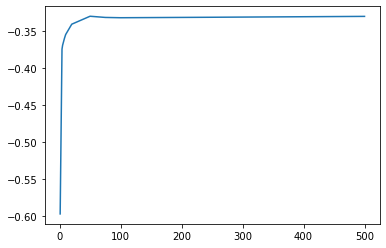

In [113]:
plt.plot(n_estimators_array, results)

In [58]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_leaf': [1, 2, 4]}


In [59]:
rf = RandomForestClassifier(n_estimators=500)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, random_state=42)

In [60]:
rf_random.fit(bigxtrain, bigytrain)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [ ]:
rf_random.best_params_

In [ ]:
forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features=None, max_depth=80)
forest.fit(bigxtrain, bigytrain)

In [ ]:
forestPredictions = forest.predict(bigxtest)
print(confusion_matrix(bigytest, forestPredictions))
print(classification_report(bigytest, forestPredictions))

In [ ]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

In [ ]:
feature_importances.plot(kind='barh', figsize=(7,6))